# Rayleigh-Bénard convection in a porous semicircle

Refer to `A15.0_darcy_convection_equations.md` for details of the governing equations and non-dimensionalization. In the non-dimensionalization used for this problem, the domain's dimensionless length unity so $R=\mathcal{O}(1)$.  Furthermore if the domain length scale $\mathcal{L}_\Omega$ is chosen as the semicircle's radius, then $R=1$. 

horizontal semicircle

$$\Omega = \{(x, y)~:~0 < x^2 + y^2 < R^2~,~y>0\}$$

$$\partial\Omega_{\text{arc}} = \{(x, y)~:~ x^2 + y^2 = R^2 \}$$

$$\partial\Omega_{\text{lower}} = \{(x, y)~:~ y=0 \}$$

$$\textbf{e}_g=-\textbf{e}_y \implies e_g^x=0~,~e_g^y=-1$$

uniform porous medium

$$
\begin{align*}
\phi &= 1 \\
\mathsf{D} &= \mathsf{I} \\ 
\mathsf{K} &= \mathsf{I}\\ 
\mu &= 1 \\
\rho(c) &= -c
\end{align*}
$$

noise initial condition

$$c_0(r)=\mathcal{N}(r)~~,~~r=\sqrt{x^2 + y^2}$$

prescribed temperature on lower and arc boundaries

$$c\vert_{\partial\Omega_{\text{lower}}}=1$$

$$c\vert_{\partial\Omega_{\text{arc}}}=0$$

no-penetration on entire boundary

$$\textbf{n}\cdot\textbf{u}|_{\partial\Omega}=0\implies\psi\vert_{\partial\Omega}=0$$

In [ ]:
from lucifex.fdm import AB2, CN
from lucifex.sim import integrate
from lucifex.utils import triangulation
from lucifex.viz import plot_colormap, plot_mesh
from lucifex.io import write

from py.darcy_convection_rayleigh_benard import darcy_convection_rayleigh_benard_semicircle


simulation = darcy_convection_rayleigh_benard_semicircle(
    Nradial=32,
    Ra=300.0, 
    c_eps=1e-3,  
    c_freq=8, 
    D_adv=AB2,
    D_diff=CN,
)

n_stop = 400
dt_init = 1e-6
n_init = 5
integrate(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

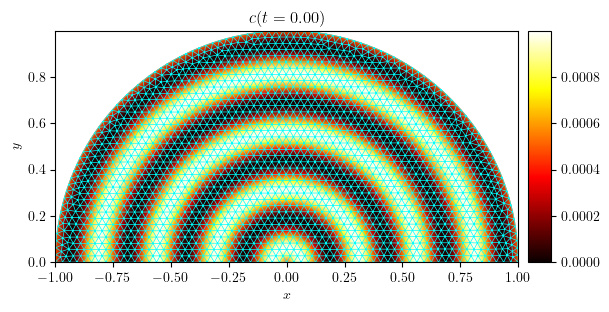

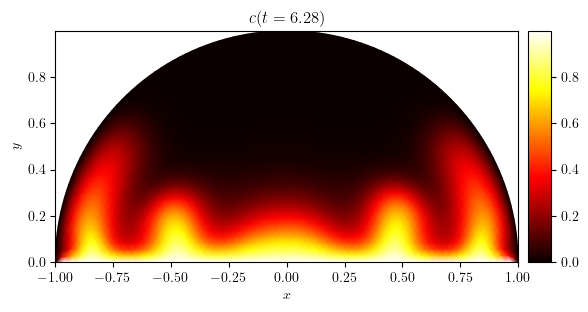

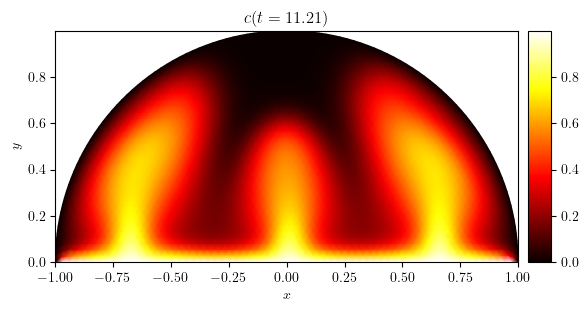

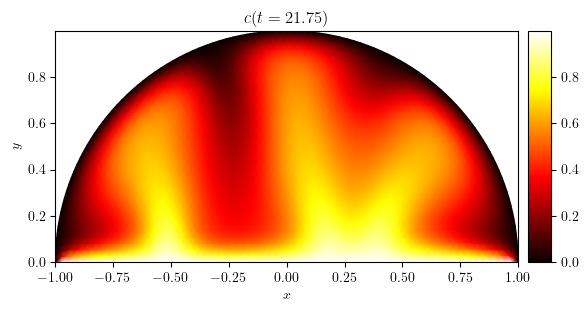

: 

In [ ]:
c = simulation['c']
mesh = c.mesh
mesh_tri = triangulation(c.function_space.mesh)
x, y = mesh_tri.x, mesh_tri.y

i_qrt = int(0.25 * len(c.series))
i_mid = int(0.5 * len(c.series))
time_indices = (0, i_qrt, i_mid,  -1)
for i in time_indices:
    c_tri = triangulation(c.series[i])
    fig, ax = plot_colormap(
        (mesh_tri, c_tri), 
        title=f'$c(t={c.time_series[i]:.2f})$',
        cartesian=False, 
    )
    if i == 0:
        plot_mesh(fig, ax, mesh, color='cyan', linewidth=0.5)
    write(
        fig, 
        f'A15d_rayleigh_benard_semicircle_c(t={c.time_series[i]:.2f})', 
        './figures', 
        file_ext=['pdf', 'png'],
        close=False, 
        pickle=False,
    )